# 3.2 인공신경망 모델
- p.71~
- 배치사이즈: 오차계산하고 w,b값 갱신할 데이터 단위
    - 현재 4개의 x값이 있으며 배치를 1로 하면 1번째 데이터/4개의 모든 데이터중, 2/4, 3/4, 4/4임
    - 배치를 3으로하면 1(1,2,3데이터)/2, 2(4번째데이터)/2 임
    - 배치사이즈는 사용자가 정의하지 않아도 됨.(optimizer에서 배치를 자동으로 결정함)
- epochs: 전체 데이터를 사용하여 학습하는 횟수(epochs할때마다 가중치가 갱신됨)


- Dense(1, input_dim=3, activation='sigmoid'))
    - 첫번째 인자 : 출력 뉴런의 수를 설정합니다.
    - input_dim : 입력 뉴런의 수를 설정합니다.
    - init : 가중치 초기화 방법 설정합니다.
        - ‘uniform’ : 균일 분포
        - ‘normal’ : 가우시안 분포
    - activation : 활성화 함수 설정합니다.
        - ‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
        - ‘relu’ : rectifier 함수, 은익층에 주로 쓰입니다.
        - ‘sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
        - ‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 3.2.1 퍼셉트론
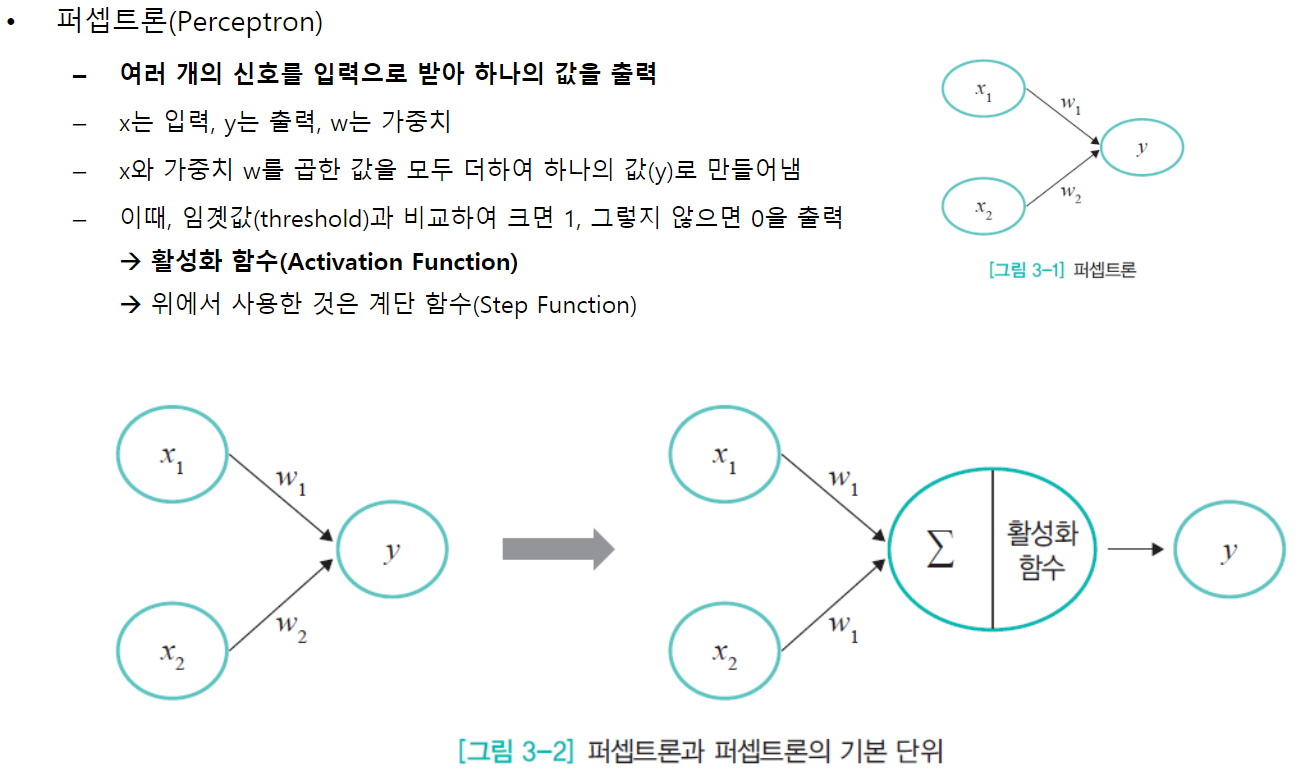

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential # 층을 구성하겠다.
from tensorflow.keras.layers import Dense # 층에 대한 노드 개수를 지정
from tensorflow.keras.optimizers import SGD # 최적화 함수에 대하여 설정
from tensorflow.keras.losses import mse # 로스 지정

In [ ]:
tf.random.set_seed(777)

# 데이터 준비하기
data = np.array([[0,0], [1,0], [0,1], [1,1]]) # 넘파이로 데이터 전달
label = np.array([[0],[1],[1],[1]])

In [ ]:
# 모델 구성하기: Dense 1개
model = Sequential() # tensorflow.keras.models.Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear')) # 활성화함수 wx+b, input_shape에는 x개수를 튜플로 전달하기

# 모델 준비하기
model.compile(optimizer=SGD(), loss=mse, metrics=['acc']) # list 형태로 평가지표 전달

# 학습시키기
model.fit(data, label, epochs=10, batch_size=1)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 1.3605 - acc: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 1.1247 - acc: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9413 - acc: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7983 - acc: 0.5000
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.6863 - acc: 0.5000
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 0.5980 - acc: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.5256 - acc: 0.5000
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4680 - acc: 0.5000
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4228 - acc: 0.7500
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.3870 - acc: 0.7500


In [ ]:
model.summary()
# param: 노드에서 나가는 선의 개수, param공식: (input개수+bias수 1)*dense수
# 현재는 노드가 x1, x2, 1(바이어스)
# 여기에 계산되는 가중치가 Param의 개수(w1,w2,b)
# 따라서 input의 x값이 2개임으로 w1,w2,b 3개의 노드가 있어서 Param갯수가 3임.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# x1과 x2의 자료를 갖고있으니깐, x1의 가중치 w1, x2의 가중치 w2, b 한개
# [w1,w2], b

we = model.get_weights() # 모델 가중치 확인, Param갯수만큼 출력됨. [[w1],[w2]], [b]
print(we)
# w는 같은 배열에 넣고
# b는 한 개의 항으로 제공

[array([[ 0.7162235 ],
       [-0.46900585]], dtype=float32), array([0.4076864], dtype=float32)]


In [ ]:
# 직접 예측값 계산해보기
w1 = we[0][0] # x1의 w1
w2 = we[0][1] # x2의 w2
b = we[1] # b

y_pred = data[:,0]*w1 + data[:,1]*w2 + b
y_pred

array([ 0.40768641,  1.12390989, -0.06131944,  0.65490404])

In [ ]:
# evaluate(): 평가를 진행
# # 손실값, 정확도
print(model.evaluate(data, label))

# predict(): 예측을 진행
preds = model.predict(data)
for a,b in zip(preds,label):
    print(f'예측값 {a} -  실제값 {b}')

1/1 [==============================] - 0s 225ms/step - loss: 0.3568 - acc: 0.7500
[0.3567630648612976, 0.75]
예측값 [0.4076864] -  실제값 [0]
예측값 [1.12391] -  실제값 [1]
예측값 [-0.06131944] -  실제값 [1]
예측값 [0.654904] -  실제값 [1]


- Dense=1, 퍼셉트론 개수가 2인 경우

In [ ]:
# 모델 구성하기
model = Sequential() # tensorflow.keras.models.Sequential()
model.add(Dense(2, input_shape=(2,), activation='linear')) # 활성화함수 wx+b
# model.add(Dense(1, activation='linear')) # 이 코드를 추가하면 Dense layer는 2가 됨.

# 모델 준비하기
model.compile(optimizer=SGD(), loss=mse, metrics=['acc']) # list 형태로 평가지표 전달

# 학습시키기
model.fit(data, label, epochs=2, batch_size=1)

Epoch 1/2
4/4 [==============================] - 0s 3ms/step - loss: 0.9936 - acc: 0.2500
Epoch 2/2
4/4 [==============================] - 0s 3ms/step - loss: 0.9022 - acc: 0.2500


In [ ]:
model.summary()  # Param의 갯수는 노드에서 나가는 선의 갯수
# input의 x값이 2개임으로 w1,w2,b 3개의 노드가 있어서 Param갯수가 3임.
# 이러한 3개의 파람을 갖는 세트가 2개있음.(Dense=2) 총 6개임

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights() # 모델 가중치 확인
# [[w11,w21],[w12,w22]],[b1,b2]  ==> [[Dense1의 w1,Dense2의 w1],[Dense1의 w2,Dense2의 w2]],[Dense1의b,Dense2의b]

[array([[-0.15591462,  0.60665405],
        [ 0.4868804 , -0.8903257 ]], dtype=float32),
 array([0.04647271, 0.07136649], dtype=float32)]

In [ ]:
tmp = model.get_weights()
w1 = tmp[0][0] # x1의 가중치
w2 = tmp[0][1] # x2의 가중치
b1 = tmp[1][0] # 출력 뉴런1의 bias
b2 = tmp[1][1] # 출력 뉴런2의 bias

print(w1)
print(w2)
print('y_pred1: ', data[:,0]*w1[0]+data[:,1]*w2[0]+b1) # x1=data[:,0], x2=data[:,1]
print('y_pred2: ', data[:,0]*w1[1]+data[:,1]*w2[1]+b2)

[-0.15591462  0.60665405]
[ 0.4868804 -0.8903257]
y_pred1:  [ 0.04647271 -0.10944191  0.5333531   0.37743848]
y_pred2:  [ 0.07136649  0.67802054 -0.81895924 -0.21230519]


In [ ]:
# evaluate(): 평가를 진행
model.evaluate(data, label)

# predict(): 예측을 진행
preds = model.predict(data)
for a,b in zip(preds,label):
    print(f'예측값 {a} -  실제값 {b}')

1/1 [==============================] - 0s 18ms/step - loss: 0.8407 - acc: 0.2500
예측값 [0.04647271 0.07136649] -  실제값 [0]
예측값 [-0.10944191  0.67802054] -  실제값 [1]
예측값 [ 0.5333531  -0.81895924] -  실제값 [1]
예측값 [ 0.37743846 -0.21230519] -  실제값 [1]


## 활성화함수
- 활성화함수: dense층의 결과를 계산하는 공식
- 중간 Dense layer와 최종 Dense layer에서 사용하는 함수는 다름
- 중간 Dense layer는 다음 Dense layer에 넘어가기에 적합한 값을 의미 (거의 Relu 라는 함수를 사용)
- 최종 Dense layer의 출력값은 원하는 y값을 의미
    - y값은 무한대의 숫자인 선형회귀 이거나, 결과는 무한대의 숫자중 1개  (활성화함수 기재안함)
    - 0또는1값 중 한 개인 이항분류이거나
        - 결과1은 0또는1의 한개의 비트  (활성화함수 시그모이드)
        - 결과2는 0값을[1,0] 1값을[0,1]의 두개의 비트로 표현하는 원핫인코딩(활성화함수 소프트맥스)
    - 여러개의 다항분류이거나, 무조건 분류갯수만큼 원핫인코딩 (활성화함수 softmax)
        - 예) 개,고양이,사자,사슴  4개의분류가 있으면 개는1, 고양이는2, 사자는3,사슴은4
        - 개는[1,0,0,0]   고양이는[0,1,0,0,]  사자는 [0,0,1,0]  사슴은 [0,0,0,1]


### 활성화함수 - linear함수

In [ ]:
data = np.array([[5, 20], [3, 0], [8, 1], [1, 1]])  # 입력데이터셋의 형태는 신경망의 input값에 사용됨. 입력의 갯수와 신경망의 input의갯수가 다르면 error
label = np.array([[0], [1], [1], [1]]) 

model = Sequential() 
model.add(Dense(1, input_shape = (2,), activation = 'linear')) 
#model.add(Dense(1, input_shape = (2,))) # activation을 사용하지 않아도 선형식이 됨. 단 w,b의 랜덤값이 다르게 나옴

model.compile(optimizer = SGD(), loss = mse, metrics = ['acc']) 
model.fit(data, label, epochs = 2,batch_size=1,verbose=0) # verbose=0 실행화면 안나옴

In [ ]:
# linear 함수이기때문에 무한대의 숫자값이 나옴
preds = model.predict(data)
for a, b in zip(preds, label):
    print(f"예측값 {a} - 정답 {b}")

예측값 [-519.29736] - 정답 [0]
예측값 [24.150042] - 정답 [1]
예측값 [35.480904] - 정답 [1]
예측값 [-19.523718] - 정답 [1]


In [ ]:
model.get_weights()

[array([[  7.8578033],
        [-27.958153 ]], dtype=float32), array([0.57663125], dtype=float32)]

In [ ]:
paramValue=model.get_weights()  # Param갯수만큼 출력됨.

# 직접 예측값 계산해보기
x1=data[:,0] ; x2=data[:,1]
w1=paramValue[0][0] ; w2=paramValue[0][1]; b=paramValue[1]
y_pred=x1*w1+x2*w2+b
y_pred

array([-519.29740745,   24.15004128,   35.48090523,  -19.52371818])

### 활성화함수 - sigmoid
- 0과 1의 사이의 값만 나오게 하는 함수

In [ ]:
data = np.array([[5, 20], [3, 0], [8, 1], [1, 1]])  # 입력데이터셋의 형태는 신경망의 input값에 사용됨. 입력의 갯수와 신경망의 input의갯수가 다르면 error
label = np.array([[0], [1], [1], [1]]) 

model = Sequential() 
model.add(Dense(1, input_shape = (2,), activation = 'sigmoid')) 
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc']) 
model.fit(data, label, epochs = 2,batch_size=1,verbose=0) # verbose=0 실행화면 안나옴

In [ ]:
# sigmoid 함수이기때문에 0또는1 사이의 숫자값이 나옴
preds = model.predict(data)
for a, b in zip(preds, label):
    print(f"예측값 {a} - 정답 {b}")

예측값 [2.2450816e-07] - 정답 [0]
예측값 [0.841648] - 정답 [1]
예측값 [0.9717856] - 정답 [1]
예측값 [0.41503102] - 정답 [1]


In [ ]:
import numpy as np
paramValue=model.get_weights()  # Param갯수만큼 출력됨.

# 직접 예측값 계산해보기
x1=data[:,0] ; x2=data[:,1]
w1=paramValue[0][0] ; w2=paramValue[0][1]; b=paramValue[1]
y_pred=1/(1+np.exp(-x1*w1-x2*w2-b))  # 시그모이드 함수 이용
y_pred

array([2.24507857e-07, 8.41648038e-01, 9.71785601e-01, 4.15031014e-01])

### 활성화함수 - softmax 함수

In [ ]:
data = np.array([[5, 20], [3, 0], [8, 1], [1, 1]])
label = np.array([[0], [1], [1], [1]]) 

label_onehot = tf.keras.utils.to_categorical(label,num_classes=2) 
print(label_onehot)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
model = Sequential() 
model.add(Dense(2, input_shape = (2,), activation = 'softmax')) 

model.compile(optimizer = SGD(), loss = mse, metrics = ['acc']) 
model.fit(data, label_onehot, epochs = 2,batch_size=1,verbose=0) # verbose=0 실행화면 안나옴

In [ ]:
# sigmoid 함수이기때문에 0또는1 사이의 숫자값이 나옴
preds = model.predict(data)
for a, b in zip(preds, label_onehot):
    print(f"예측값 {a} - 정답 {b}")

예측값 [1.0000000e+00 3.0612932e-11] - 정답 [1. 0.]
예측값 [0.08703157 0.91296846] - 정답 [0. 1.]
예측값 [0.0078361 0.9921639] - 정답 [0. 1.]
예측값 [0.64889014 0.35110983] - 정답 [0. 1.]


## 정리
- 인공신경망은 사용자가 x값의 input갯수와, 출력y값의 갯수
y값의 활성화함수를 신경써야함. 
- model.add 에 dense를 구성하는 노드갯수를 설정하여 Param갯수를 정할수 있음
- 최종 y값에 따라 활성화함수를 다르게 지정하여야함.
- 활성화함수는 오차계산법도 다르게 지정하여야함.
- 일반적으로
    - 선형회귀는 mse, mae 
    - 시그모이드는 binary_crossentropy 
    - 소프트맥스는 categorical_crossentropy 
       - 단 onehot인코딩 안한상태에서 원핫인코딩하면서 오차 계산해주는 식 사용가능 SparseCategoricalCrossentropy



- model.add가 많을수록 수많은 weight가 생성됨.
- weight가 많으면 많을수록 훈련데이터에 잘 맞추어서 overffing(훈련만 잘맞고,검증은 잘 안맞음) 될수 있음.
- 이 오버피팅을 없애는 방법
    - dense중간층에 dropout(비율)을 사용
    - 레이어 개수 설정
    - dense units의 개수 설정
    - 옵티마이저(최적화함수)
    - 손실함수 = loss 설정
    - 러닝레이트값 설정: lr 등 w업데이트에 사용되는 값, 값이 작을수록 짧은 간격으로 업데이트
    - batch_size 설정
    - epochs 설정